In [31]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../../")
import ompy

Calibration coefficients: {'a00': -3.5, 'a01': 112.0, 'N0': 125, 'a10': -3.5, 'a11': 112.0, 'N1': 125}
E_max =  13884.5


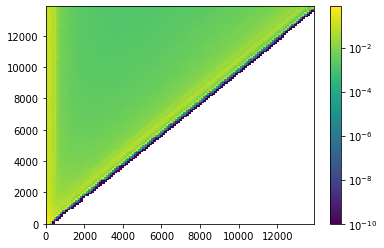

In [2]:
# Load a response matrix
#fname_resp_mat = "Dy164/data/response_matrix.m"
#fname_resp_mat = "response_matrix_OSCAR_Si28_compressed.m"
fname_resp_mat = "response_matrix_OSCAR_Si28_compressed.m"
R_mama = ompy.read_mama_2D(fname_resp_mat)

zmin_resp = 1e-10 # Plotting

print("Calibration coefficients:", R_mama.calibration())
print("E_max = ", R_mama.E0_array.max())

cbar = R_mama.plot(zscale="log", zmin=zmin_resp)
plt.colorbar(cbar)

In [48]:
# Then do the same using OMpy functionality:

folderpath = "/home/fabiobz//oslo-method-software/mama/resp/oscar2017_scale1.15"
# TODO port to old NaI: I wrote the original code for Fabio's OSCAR responses. But we need to be able to use the old NaI response functions also.
#folderpath = "/home/jorgenem/gitrepos/oslo-method-software/mama/resp/nai2012"

# Energy calibration of resulting response matrix:
Eout_array = ompy.E_array_from_calibration(a0=0.525000E+02-112/2, a1=0.112000E+03, E_max=13000)

# Experimental relative FWHM at 1.33 MeV of resulting array (TODO set up default value for this):
FWHM = 2.27 # I think this is the standard in MAMA, TODO double check

R_ompy, f_FWHM_rel, f_Eff_tot, f_pcmp, f_pFE, f_pSE, f_pDE, f_p511 = ompy.interpolate_response(folderpath, Eout_array, FWHM)

<IPython.core.display.Javascript object>


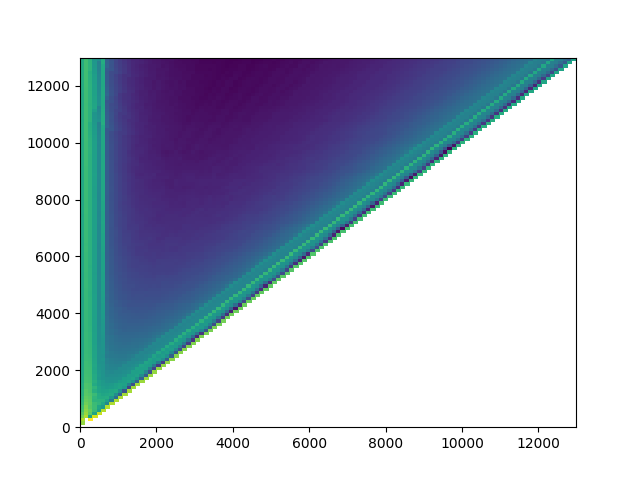

<IPython.core.display.Javascript object>


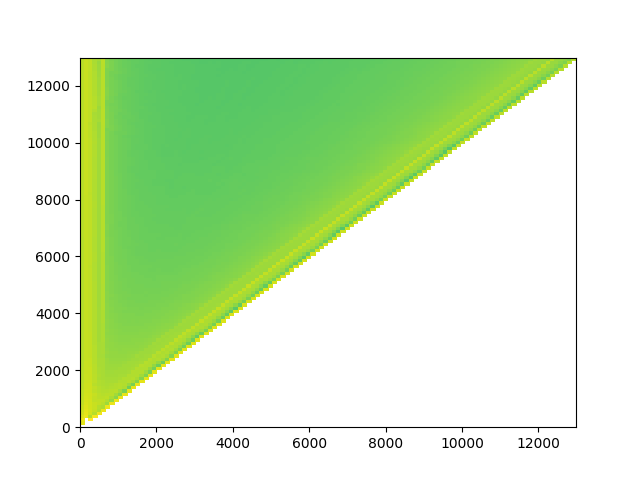

<IPython.core.display.Javascript object>


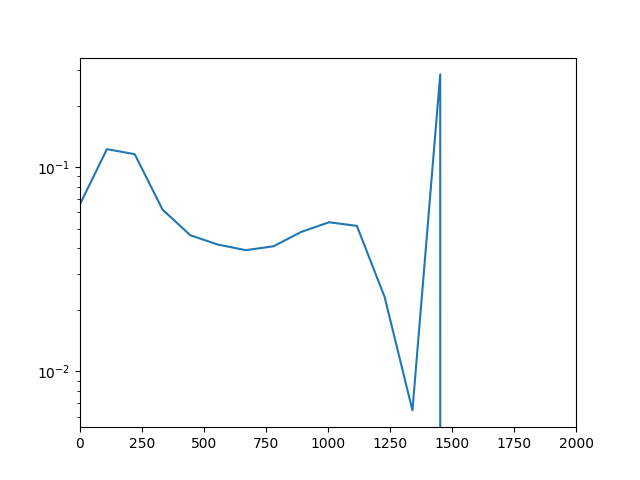

In [49]:
#R_ompy = ompy.Matrix(matrix=R_ompy, E0_array=Eout_array, E1_array=Eout_array)
R_ompy.plot()
R_ompy.plot(zscale="log", zmin=zmin_resp)

f, ax = plt.subplots()
R_ompy.plot_projection_x(E_limits = [E-50, E+50], ax=ax, label="R_ompy")
ax.set_yscale("log")
ax.set_xlim(0, E+500)
R_ompy

<IPython.core.display.Javascript object>


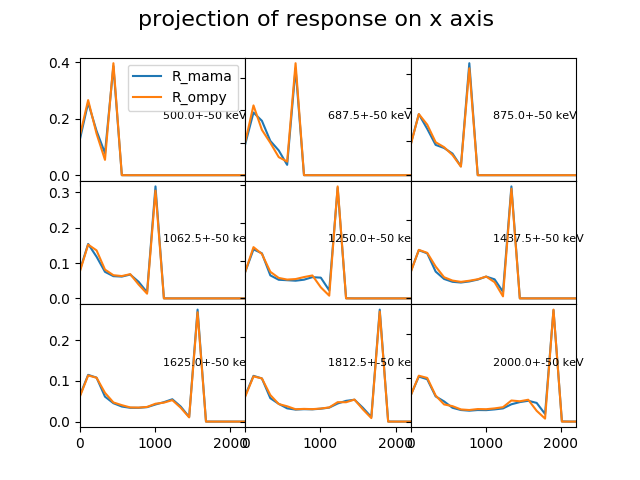

/home/fabiobz/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


In [50]:
# Compare projections:
%matplotlib notebook

E_arr = np.linspace(500, 2000, 9)
fig, ax_mat = plt.subplots(3,3, constrained_layout=True,
                          sharex=False, sharey=False,
                          )
for i, E in enumerate(E_arr):
    ax = ax_mat.flatten()[i]
    
    E_limits = [E-50, E+50]
    
    # MAMA:
    R_mama.plot_projection_x(E_limits = E_limits, ax=ax, label="R_mama")

    # ompy:
    R_ompy.plot_projection_x(E_limits = E_limits, ax=ax, label="R_ompy")
    
#     ax.set_yscale("log")
#     ax.set_ylim(1e-2,0.5)
    ax.set_xlim(0, E_arr[-1]+200)
    if i==0:
        ax.legend()
        
    if i<6:
        ax.set_xticklabels([])
    if i%3 != 0:
        ax.set_yticklabels([])
        
    ax.text(0.5, .5, "{}+-50 keV".format(E),
           transform = ax.transAxes, fontsize=8)
fig.suptitle('projection of response on x axis ', fontsize=16)
plt.subplots_adjust(wspace=0, hspace=0)

fig.savefig("response_compare_2.png")
plt.show()


## Test gauss smoothing function:

<IPython.core.display.Javascript object>


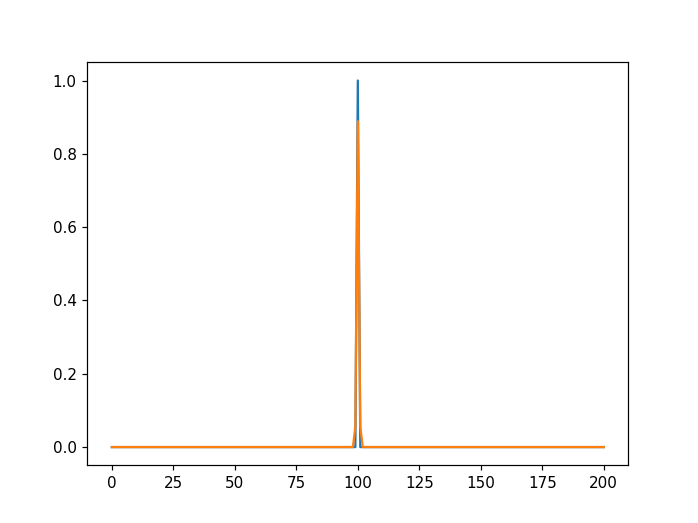

sum(counts_array) =  1.0
sum(counts_array_smoothed) =  0.9999999999999999


In [6]:
E_array = np.linspace(0, 200, 201)
counts_array = np.zeros(len(E_array))
counts_array[100] = 1
counts_array_smoothed = ompy.gauss_smoothing(counts_array, E_array, np.ones(len(E_array)))

f, ax = plt.subplots(1)
ax.plot(E_array, counts_array)
ax.plot(E_array, counts_array_smoothed)

print("sum(counts_array) = ", counts_array.sum())
print("sum(counts_array_smoothed) = ", counts_array_smoothed.sum())